<h1><center>Problem 2</center><h1>

Importing all the necessary libraries that required for the model.

In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [291]:
df = pd.read_csv('Problem Staement 2.csv')
df.head()

,Unnamed: 0,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.5,14.0,1.0
1,1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.4,53.0,3.0
2,2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.4,4733.0,463.0
3,3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,4.3,10406.0,1040.0
4,4,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,14.0,3.8,18.0,3.0


<p>dropping the columns that have image links that is of no use in eda and serial number column</p>

In [292]:
df = df.drop(['img_link'], axis = 1)
df=df.rename(columns={"Unnamed: 0":"sr"})
df=df.drop(['sr'],axis=1)
df.head()

,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.5,14.0,1.0
1,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.4,53.0,3.0
2,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.4,4733.0,463.0
3,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,4.3,10406.0,1040.0
4,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,14.0,3.8,18.0,3.0


Visualizing the Dataset Via Pairplot

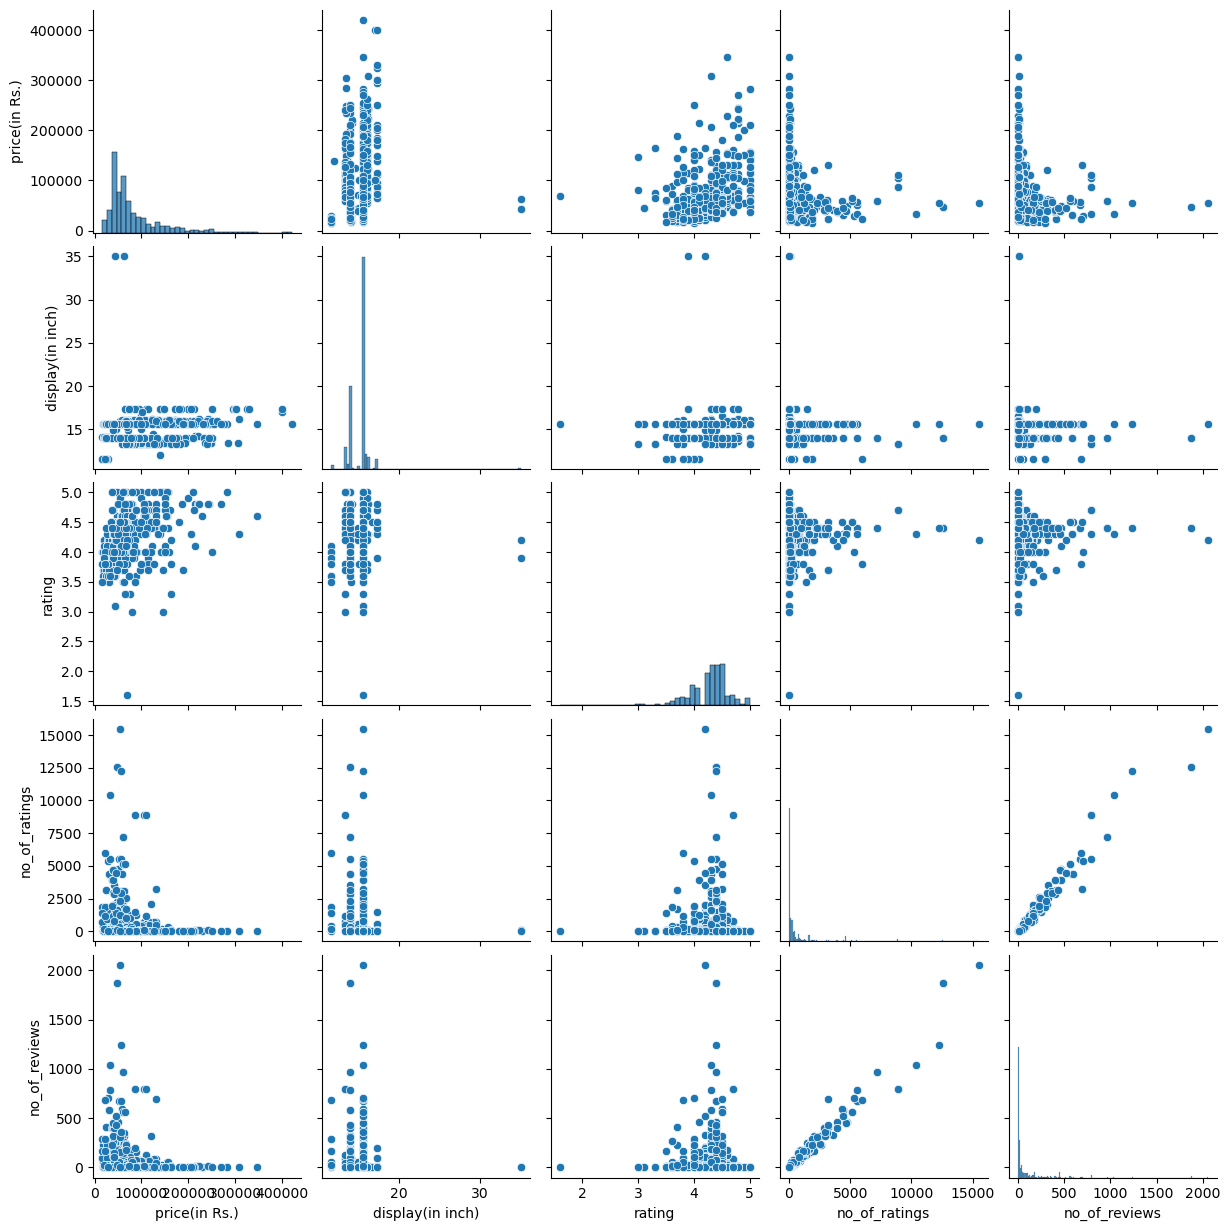

In [293]:
sns.pairplot(df)

Making the Box plot for analysing outliers

<AxesSubplot: >

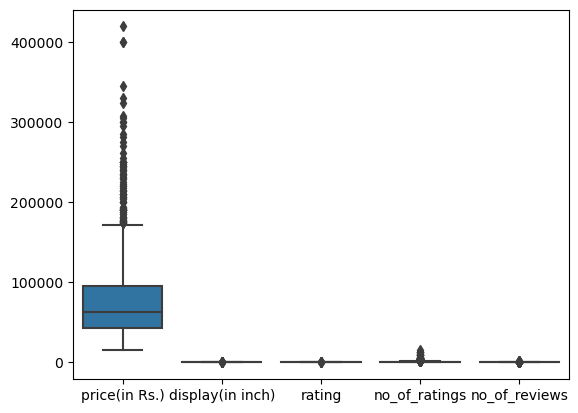

In [294]:
sns.boxplot(data=df)

In this Dataset there are outliers present in price but we are not removing them as it is target variable and for eda we are not dealing with outliers because price of heavy featured laptops may be high.

Finding Top 5 Brands

In [295]:
brand = []
for i in df['name']:
    brand.append(i.split(' ')[0].capitalize())
df['brand'] = brand

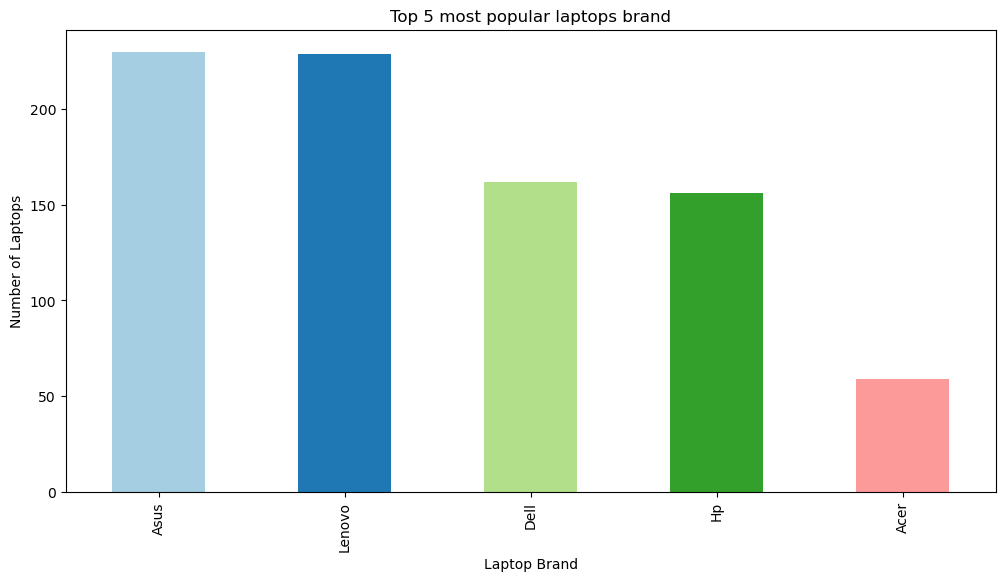

In [296]:
plt.figure(figsize=(12,6))
df.groupby('brand').size().sort_values(ascending=False).head(5).plot(kind = 'bar',color = sns.color_palette('Paired'))
plt.xlabel('Laptop Brand')
plt.ylabel('Number of Laptops')
plt.title('Top 5 most popular laptops brand')
plt.show()

We can see that most populer brands are Asus Lenovo and Dell That are Available on Flipkart.

In [297]:
df.corr()

,price(in Rs.),display(in inch),rating,no_of_ratings,no_of_reviews
price(in Rs.),1.000000,0.088121,0.290309,-0.128684,-0.124797
display(in inch),0.088121,1.000000,0.027342,-0.084907,-0.086153
rating,0.290309,0.027342,1.000000,0.054964,0.044456
no_of_ratings,-0.128684,-0.084907,0.054964,1.000000,0.977843
no_of_reviews,-0.124797,-0.086153,0.044456,0.977843,1.000000


Finding Corelation among neumerical data columns.<br> 
We can see that the no of ratings and reviews are negatively correlated with price and very less.<br>
only rating has a bit positive correlation with price.


Plotting relation of Ram With no of Laptops

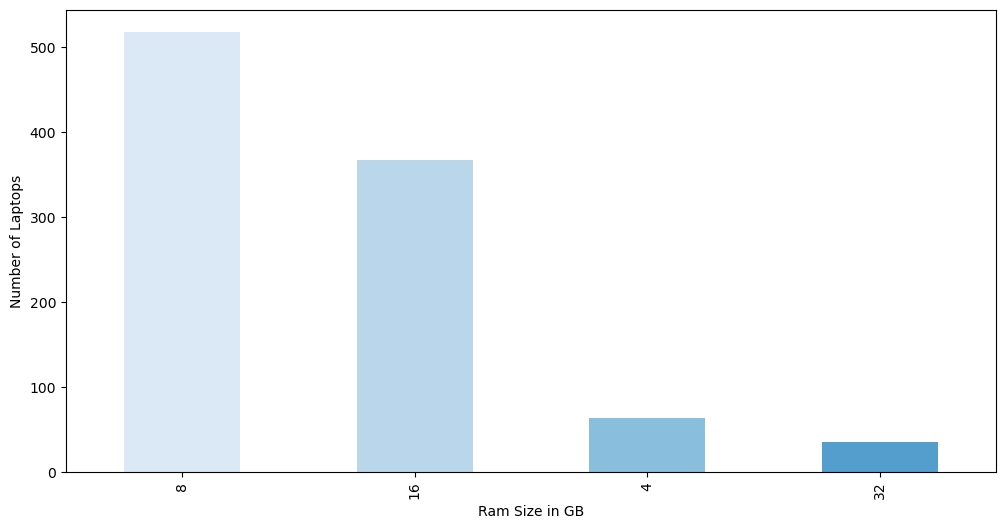

In [298]:
ram = []
for i in df['ram']:
    ram.append(int(i.split(' ')[0]))
df['ram'] = ram

plt.figure(figsize=(12,6))
df.groupby('ram').size().sort_values(ascending=False).plot(kind = 'bar',color = sns.color_palette('Blues'))
plt.xlabel('Ram Size in GB')
plt.ylabel('Number of Laptops')
plt.show()

There are 8 gb ram laptops are mostly available on flipkart.

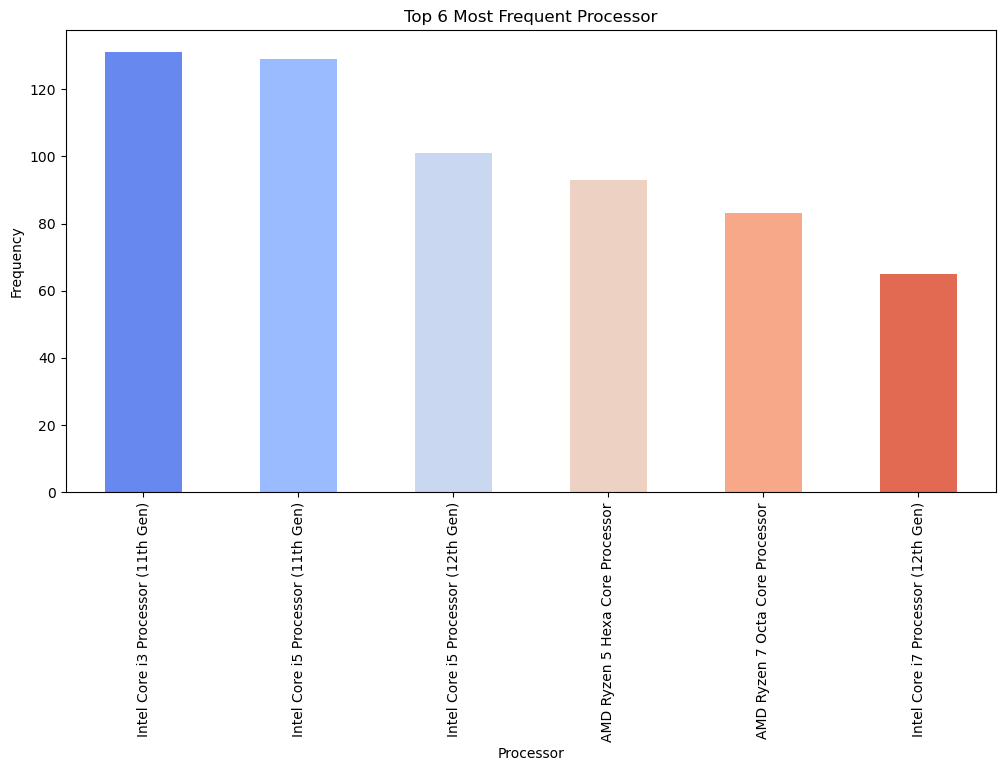

In [299]:
plt.figure(figsize=(12,6))
df.groupby('processor').size().sort_values(ascending = False).head(6).plot(kind = 'bar', color = sns.color_palette("coolwarm"))
plt.xlabel("Processor")
plt.ylabel("Frequency")
plt.title("Top 6 Most Frequent Processor")
plt.show()

Intel i3 11th generation and Intel i5 11th generation laptops are more available 

In [300]:
os = []
for i in df['os']:
    os.append(i.split('bit')[-1].strip())
    
df['operating_system'] = os

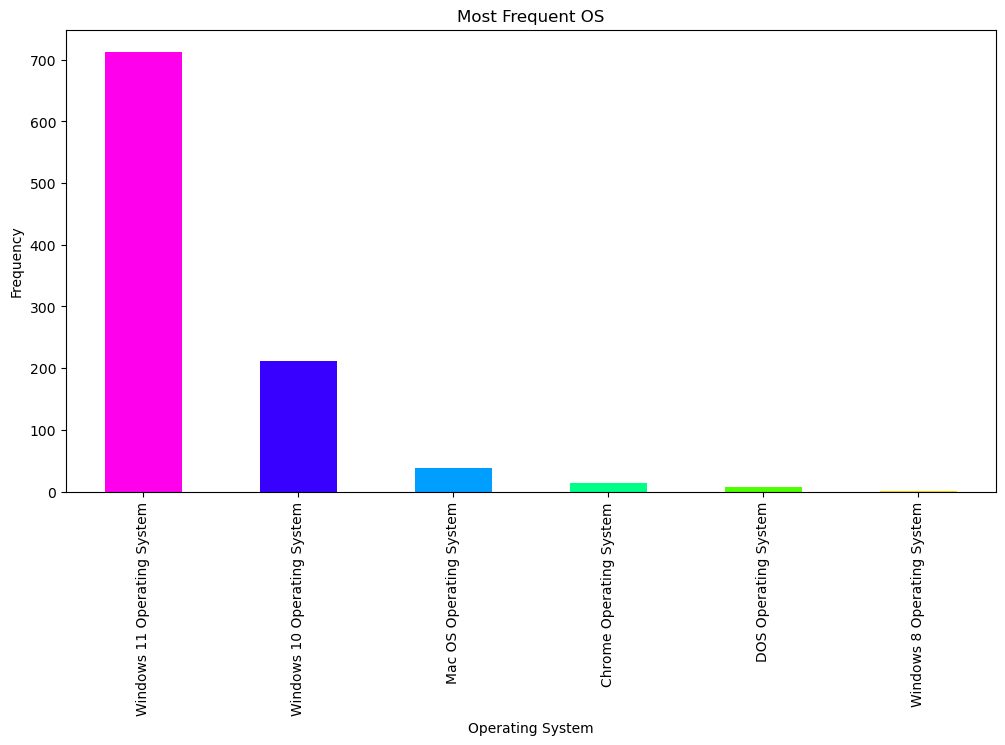

In [301]:
plt.figure(figsize=(12,6))
df.groupby('operating_system').size().sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette("hsv_r"))
plt.xlabel("Operating System")
plt.ylabel("Frequency")
plt.title("Most Frequent OS")
plt.show()

Windows 11 is the first os that is mostly available,windows 10 is second And then Mac comes

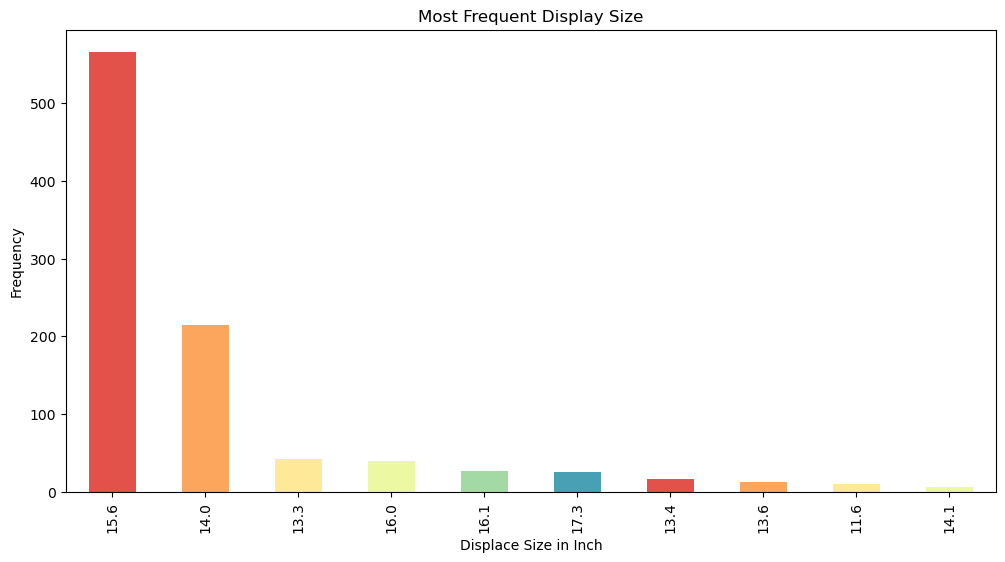

In [302]:
plt.figure(figsize=(12,6))
df.groupby('display(in inch)').size().sort_values(ascending = False).head(10).plot(kind = 'bar', color = sns.color_palette("Spectral"))
plt.xlabel("Displace Size in Inch")
plt.ylabel("Frequency")
plt.title("Most Frequent Display Size")
plt.show()

Most frequent display sizes are 15.6 and 14.

In [303]:
laptop_comparison = df[['name', 'processor', 'ram', 'os', 'storage', 'display(in inch)', 'price(in Rs.)']]
laptop_comparison = laptop_comparison.sort_values(by='price(in Rs.)')
laptop_comparison

,name,processor,ram,os,storage,display(in inch),price(in Rs.)
74,ASUS Chromebook Flip Touch Celeron Dual Core,Intel Celeron Dual Core Processor,4,Chrome Operating System,2 TB SSD,11.6,15990
402,Avita SATUS S111 Celeron Dual Core,Intel Celeron Dual Core Processor,4,64 bit Windows 11 Operating System,128 GB SSD,14.1,16490
671,Avita SATUS S111 Celeron Dual Core,Intel Celeron Dual Core Processor,4,64 bit Windows 11 Operating System,128 GB SSD,14.1,16990
965,Lenovo IdeaPad 3 Chromebook Celeron Dual Core,Intel Celeron Dual Core Processor,4,Chrome Operating System,128 GB SSD,11.6,16990
73,ASUS Chromebook Celeron Dual Core,Intel Celeron Dual Core Processor,4,Chrome Operating System,2 TB SSD,15.6,17990
...,...,...,...,...,...,...,...
492,ASUS Zenbook 17 Fold OLED Intel EVO Core i7 12...,Intel Core i7 Processor (12th Gen),16,64 bit Windows 11 Operating System,1 TB SSD,17.3,329990
293,ALIENWARE Core i9 10th Gen,Intel Core i9 Processor (10th Gen),32,64 bit Windows 10 Operating System,1 TB SSD,15.6,345390
72,MSI Core i9 13th Gen,Intel Core i9 Processor (13th Gen),32,Windows 11 Operating System,2 TB SSD,17.0,399990
452,ASUS ROG Strix Scar 17 SE (2022) with 90Whr Ba...,Intel Core i9 Processor (12th Gen),32,64 bit Windows 11 Operating System,4 TB SSD,17.3,399990


In [304]:
df.describe()

,price(in Rs.),ram,display(in inch),rating,no_of_ratings,no_of_reviews
count,984.000000,984.000000,984.000000,688.000000,688.000000,688.000000
mean,80960.720528,11.577236,15.148374,4.284884,718.091570,83.898256
std,57421.220919,5.712698,1.332078,0.330239,1750.817825,211.596726
min,15990.000000,4.000000,11.600000,1.600000,1.000000,0.000000
25%,42655.000000,8.000000,14.000000,4.100000,14.000000,2.000000
50%,62990.000000,8.000000,15.600000,4.300000,90.000000,11.000000
75%,94990.000000,16.000000,15.600000,4.500000,453.000000,53.500000
max,419990.000000,32.000000,35.000000,5.000000,15492.000000,2054.000000


From information above we can find that the mean price is 80960 Rs. and there are only 688 values are in rating, no of ratings and no of reviews.<br>
price has std_dev very high as it has outliers.<br>
minimum price of a laptop is 15990<br>
Most expensive laptop is of price 419990<br>

<h2><center>Dealing With Duplicate and Null Values</center><h2>

In [305]:
df.isnull().sum()

name                  0
price(in Rs.)         0
processor             0
ram                   0
os                    0
storage               0
display(in inch)      0
rating              296
no_of_ratings       296
no_of_reviews       296
brand                 0
operating_system      0
dtype: int64

There are 296 null values in columns rating , no_of_ratings and no_of_reviews

In [306]:
df.shape

(984, 12)

In [307]:
df.duplicated().sum()

212

There are 212 duplicate Values are there so we remove duplicates.

In [308]:
df= df.drop_duplicates()

In [309]:
df.duplicated().sum()

0

In [310]:
missing_values_count = df.isnull().sum()
missing_values_count[0:12]

name                  0
price(in Rs.)         0
processor             0
ram                   0
os                    0
storage               0
display(in inch)      0
rating              258
no_of_ratings       258
no_of_reviews       258
brand                 0
operating_system      0
dtype: int64

In [311]:
total_missing = missing_values_count.sum()
# percent of data that is missing in rating
(296/984) * 100

30.081300813008134

In [312]:
df.rating.mode()[0]

4.4

In [313]:
df['rating']=df['rating'].fillna(df.rating.mode()[0])

In [314]:
missing_values_count = df.isnull().sum()
missing_values_count


name                  0
price(in Rs.)         0
processor             0
ram                   0
os                    0
storage               0
display(in inch)      0
rating                0
no_of_ratings       258
no_of_reviews       258
brand                 0
operating_system      0
dtype: int64

In [315]:
df['rating'].isnull().sum()

0

In [316]:
pd.set_option('display.max_columns', None)
df.head()

,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews,brand,operating_system
0,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16,Windows 11 Operating System,512 GB SSD,15.6,4.5,14.0,1.0,Lenovo,Windows 11 Operating System
1,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.4,53.0,3.0,Lenovo,Windows 11 Operating System
2,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8,Windows 11 Operating System,512 GB SSD,15.6,4.4,4733.0,463.0,Asus,Windows 11 Operating System
3,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8,64 bit Windows 11 Operating System,512 GB SSD,15.6,4.3,10406.0,1040.0,Asus,Windows 11 Operating System
4,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4,DOS Operating System,256 GB SSD,14.0,3.8,18.0,3.0,Lenovo,DOS Operating System


In [347]:
df_median=df.no_of_ratings.median()
df_median

81.0

In [348]:
df['no_of_ratings']=df['no_of_ratings'].fillna(df_median)

In [349]:
missing_values_count = df.isnull().sum()
missing_values_count

name                0
price(in Rs.)       0
processor           0
ram                 0
os                  0
storage             0
display(in inch)    0
rating              0
no_of_ratings       0
no_of_reviews       0
brand               0
operating_system    0
dtype: int64

In [350]:
df_medianrr=df.no_of_reviews.median()
df_medianrr

10.0

In [351]:
df['no_of_reviews']=df['no_of_reviews'].fillna(df_medianrr)


In [352]:
missing_values_count = df.isnull().sum()
missing_values_count

name                0
price(in Rs.)       0
processor           0
ram                 0
os                  0
storage             0
display(in inch)    0
rating              0
no_of_ratings       0
no_of_reviews       0
brand               0
operating_system    0
dtype: int64

In [353]:
price_range = df['price(in Rs.)'].describe()
print(price_range)

count       772.000000
mean      88610.893782
std       61206.966696
min       15990.000000
25%       46990.000000
50%       68345.000000
75%      107765.000000
max      419990.000000
Name: price(in Rs.), dtype: float64


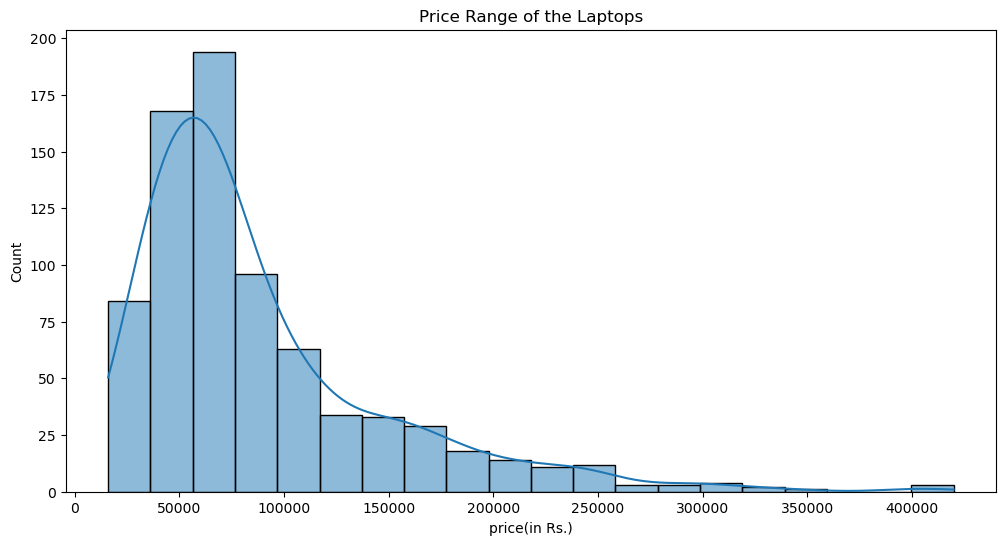

In [354]:
plt.figure(figsize=(12,6))
sns.histplot(data = df, x = 'price(in Rs.)', kde = True,bins=20)
plt.title('Price Range of the Laptops')
plt.show()

We can see that maximum no of laptops available around price 50000

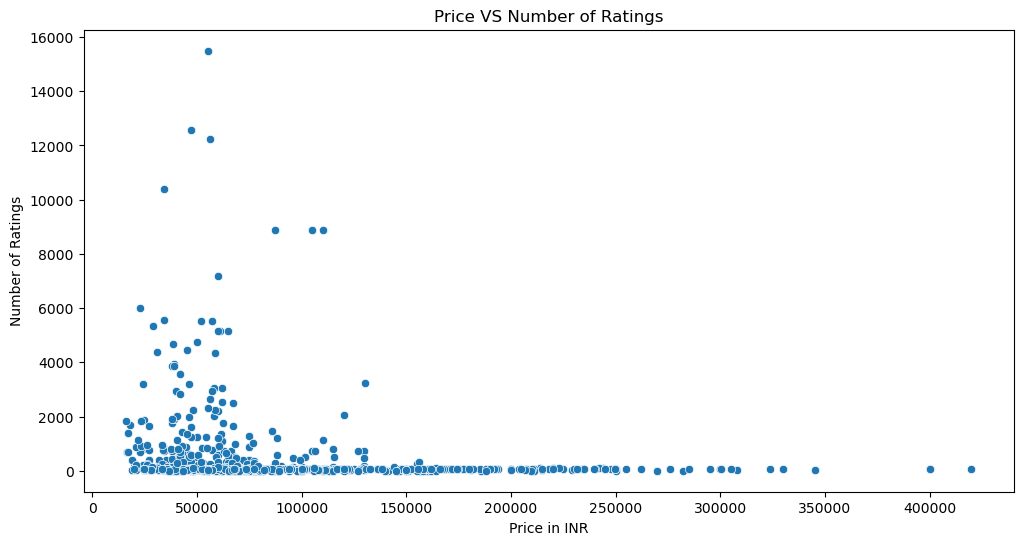

In [355]:
new_df = df[df['no_of_ratings'] != 0]
plt.figure(figsize=(12,6))
sns.scatterplot(data = new_df,x = 'price(in Rs.)', y = 'no_of_ratings')
plt.xlabel('Price in INR')
plt.ylabel("Number of Ratings")
plt.title("Price VS Number of Ratings")
plt.show()

Now we are training and testing the data.

In [356]:
X = df['ram']
y = df['price(in Rs.)']

We took the X parameter as ram and the Y parameter as price

In [357]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [358]:
X_train.head()

134    16
709     8
538    16
197     8
189    16
Name: ram, dtype: int64

In [359]:
y_train.head()

134     61400
709     47990
538    157990
197     49990
189     50499
Name: price(in Rs.), dtype: int64

Now we are importing the scalers for the standardizing

In [360]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [361]:
import statsmodels.api as sm

In [362]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm).fit()

In [363]:
lr.params

const    -971.490186
ram      7518.001706
dtype: float64

In [364]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:          price(in Rs.)   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     636.1
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           3.18e-93
Time:                        19:30:34   Log-Likelihood:                -6482.5
No. Observations:                 540   AIC:                         1.297e+04
Df Residuals:                     538   BIC:                         1.298e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -971.4902   3859.660     -0.252      0.8

printing the training X,Y parameters relation by scatter plot

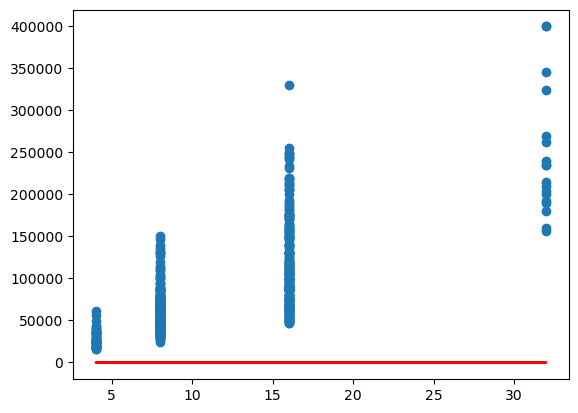

In [365]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948 + 0.054*X_train,'r')
plt.show()

In [366]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train-y_train_pred)

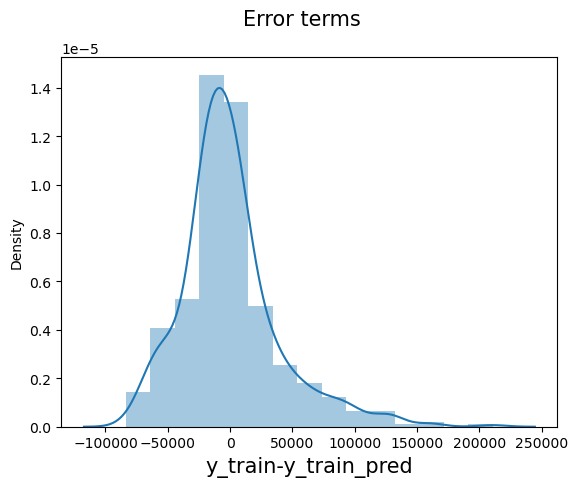

In [367]:
fig = plt.figure()
sns.distplot(res,bins = 15)
fig.suptitle('Error terms', fontsize = 15)
plt.xlabel('y_train-y_train_pred',fontsize = 15)
plt.show()

We Can see that error terms are normally distributed that is good

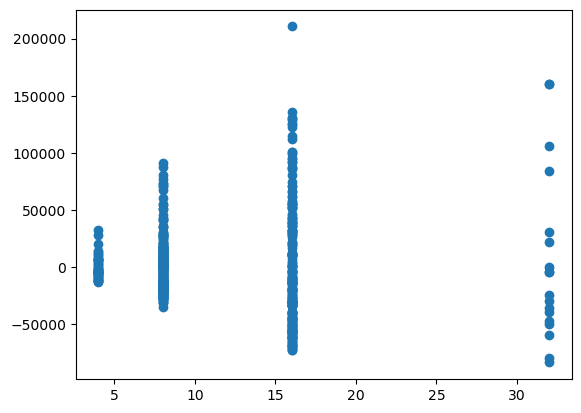

In [368]:
plt.scatter(X_train,res)
plt.show()

In [369]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [370]:
y_pred.head()

137     59172.523463
19     119316.537111
855    119316.537111
471     59172.523463
806     59172.523463
dtype: float64

In [371]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [372]:
np.sqrt(mean_squared_error(y_test,y_pred))

39516.89061112106

In [373]:
r_squared = r2_score(y_test,y_pred)
r_squared

0.6498626180342044

From the above r_squared We can understand that our model is good

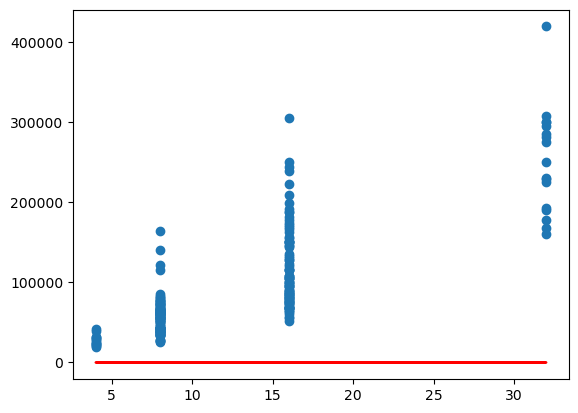

In [374]:
plt.scatter(X_test,y_test)
plt.plot(X_test,6.948+0.054*X_test,'r')
plt.show()